# Explore for UFC Fight Card Predictor

### Imports

In [224]:
# imports
import numpy as np
import pandas as pd

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# stats
import scipy.stats as stats

# My files
from Wrangle_UFC import *

### Acquire and Prepare

In [129]:
# Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)

In [130]:
final_df, fighter_stat_diff = ufc_stats_difference()

In [131]:
final_df.head(1)

,Unnamed: 0,event_name,fighter1,fighter2,outcome,win,loss,draw,no_contest,weight_f1,reach_f1,stance_f1,strikes_f1,strike_acc_f1,strikes_absorbed_f1,strike_defense_f1,takedowns_f1,takedown_acc_f1,takedown_def_f1,sub_attempt_f1,age_days_f1,age_f1,outcome_f1,height_in_f1,stance_Orthodox_f1,stance_Southpaw_f1,stance_Switch_f1,weight_f2,reach_f2,stance_f2,strikes_f2,strike_acc_f2,strikes_absorbed_f2,strike_defense_f2,takedowns_f2,takedown_acc_f2,takedown_def_f2,sub_attempt_f2,age_days_f2,age_f2,outcome_f2,height_in_f2,stance_Orthodox_f2,stance_Southpaw_f2,stance_Switch_f2,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
0,0,UFC 259: Blachowicz vs. Adesanya,Aalon Cruz,Uros Medic,fighter2,0,1,0,0,145.0,78.0,Switch,7.58,39,8.88,58,0.0,0,0,0.0,11490,31.0,fighter2,72,0,0,1,155.0,71.0,Southpaw,19.91,77,0.52,86,0.0,0,100,0.0,10177,27.0,fighter1,73,0,1,0,-10.0,7.0,-12.33,-38.0,8.36,-28.0,0.0,0.0,-100.0,0.0,1313.0,-1.0


### Split Data

In [132]:
train, validate, test = train_validate_test_split(final_df)

In [133]:
train.head(1)

,Unnamed: 0,event_name,fighter1,fighter2,outcome,win,loss,draw,no_contest,weight_f1,reach_f1,stance_f1,strikes_f1,strike_acc_f1,strikes_absorbed_f1,strike_defense_f1,takedowns_f1,takedown_acc_f1,takedown_def_f1,sub_attempt_f1,age_days_f1,age_f1,outcome_f1,height_in_f1,stance_Orthodox_f1,stance_Southpaw_f1,stance_Switch_f1,weight_f2,reach_f2,stance_f2,strikes_f2,strike_acc_f2,strikes_absorbed_f2,strike_defense_f2,takedowns_f2,takedown_acc_f2,takedown_def_f2,sub_attempt_f2,age_days_f2,age_f2,outcome_f2,height_in_f2,stance_Orthodox_f2,stance_Southpaw_f2,stance_Switch_f2,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
8625,8625,UFC 112: Invincible,Terry Etim,Rafael Dos Anjos,fighter2,0,1,0,0,155.0,73.0,Orthodox,2.16,35,2.53,67,0.43,30,39,1.4,8855,24.0,fighter2,73,1,0,0,155.0,70.0,Southpaw,3.49,46,3.22,61,1.93,37,58,0.6,9297,25.0,fighter1,68,0,1,0,0.0,3.0,-1.33,-11.0,-0.69,6.0,-1.5,-7.0,-19.0,0.8,-442.0,5.0


### Explore

Initial Questions: 

1) Does fighter1 having a higher striking defense average than fighter2 correlate to fighter 1 winning. 

2) Does fighter1 having a higher takedown defense average than fighter2 correlate to fighter 1 winning. 

3) Does fighter1 having a higher striking accuracy average than fighter2 correlate to fighter 1 winning. 

4) Does fighter1 having a higher takedown accuracy average than fighter2 correlate to fighter 1 winning. 

5) Does fighter2 being younger than fighter1 correlate to fighter 2 winning. 

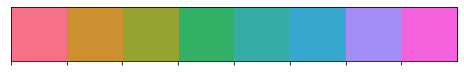

In [134]:
sns.palplot(sns.color_palette("husl", 8))

In [135]:
train.corr()

,Unnamed: 0,win,loss,draw,no_contest,weight_f1,reach_f1,strikes_f1,strike_acc_f1,strikes_absorbed_f1,strike_defense_f1,takedowns_f1,takedown_acc_f1,takedown_def_f1,sub_attempt_f1,age_days_f1,age_f1,height_in_f1,stance_Orthodox_f1,stance_Southpaw_f1,stance_Switch_f1,weight_f2,reach_f2,strikes_f2,strike_acc_f2,strikes_absorbed_f2,strike_defense_f2,takedowns_f2,takedown_acc_f2,takedown_def_f2,sub_attempt_f2,age_days_f2,age_f2,height_in_f2,stance_Orthodox_f2,stance_Southpaw_f2,stance_Switch_f2,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
Unnamed: 0,1.000000,-0.015040,0.016722,-0.009144,-0.001368,-0.017455,-0.022225,-0.026201,-0.026096,-0.016359,0.056641,-0.008010,-0.006459,0.005361,0.003076,-0.033833,-0.034847,-0.028014,-0.002597,0.018117,-0.035886,-0.018940,-0.028895,-0.020432,-0.007359,-0.011105,0.017949,0.000936,0.005086,-0.002597,-0.001619,-0.007905,-0.006299,-0.019697,0.011082,-0.009211,-0.006481,0.004309,0.008410,-0.003985,-0.014085,-0.003777,0.028959,-0.006403,-0.008099,0.005587,0.003468,-0.020244,-0.011679
win,-0.015040,1.000000,-0.968946,-0.076530,-0.097742,0.005783,0.021555,0.126017,0.098819,-0.110271,0.124097,0.078602,0.075447,0.117050,0.012524,-0.087240,-0.085919,0.015116,-0.009829,0.017782,-0.017803,-0.014347,-0.023677,-0.118525,-0.109859,0.111671,-0.109174,-0.077752,-0.072639,-0.136460,0.001357,0.090710,0.089071,-0.009254,0.017842,-0.012113,-0.015705,0.063135,0.057477,0.192739,0.153856,-0.174893,0.175254,0.111909,0.103823,0.178482,0.008260,-0.138745,0.034003
loss,0.016722,-0.968946,1.000000,-0.076530,-0.097742,-0.007844,-0.021422,-0.124544,-0.099970,0.109784,-0.118252,-0.078780,-0.071646,-0.116318,-0.010875,0.083289,0.081900,-0.015291,0.011166,-0.019390,0.018016,0.012605,0.022561,0.119643,0.106945,-0.110658,0.114346,0.079941,0.076446,0.136093,0.004128,-0.092310,-0.091041,0.008255,-0.016030,0.009070,0.017960,-0.064174,-0.055890,-0.192491,-0.152588,0.173704,-0.174765,-0.113604,-0.103799,-0.177710,-0.011084,0.136909,-0.032856
draw,-0.009144,-0.076530,-0.076530,1.000000,-0.007720,-0.014146,-0.018668,-0.011469,-0.011703,-0.006736,-0.012257,0.003937,-0.012242,0.008359,-0.011038,-0.016736,-0.015549,-0.010929,-0.001139,0.002531,-0.002364,-0.009489,-0.013029,-0.004892,0.002670,-0.022293,0.012711,0.016787,0.007782,0.008982,-0.014086,-0.019230,-0.017822,-0.012122,0.005433,-0.004417,-0.002506,-0.014858,-0.007207,-0.004988,-0.010675,0.012641,-0.018761,-0.009200,-0.014054,-0.000520,0.002222,0.001920,0.001627
no_contest,-0.001368,-0.097742,-0.097742,-0.007720,1.000000,0.021598,0.013995,0.001525,0.015052,0.007769,-0.020084,-0.002192,-0.009705,-0.010292,0.000292,0.033241,0.032651,0.009480,-0.005903,0.006185,0.000775,0.016315,0.015915,-0.001843,0.012716,0.012369,-0.036284,-0.024327,-0.025475,-0.005191,-0.016817,0.023251,0.024023,0.014605,-0.013485,0.018944,-0.009494,0.016959,-0.002401,0.002660,0.001941,-0.003890,0.012258,0.015846,0.010922,-0.003517,0.012613,0.007828,-0.007110
weight_f1,-0.017455,0.005783,-0.007844,-0.014146,0.021598,1.000000,0.765101,-0.051130,0.226414,-0.092941,-0.206888,-0.027354,0.012384,0.044843,-0.058758,0.213800,0.213100,0.803406,0.022553,-0.007705,-0.039569,0.949320,0.746207,-0.068086,0.215858,-0.097887,-0.188840,-0.037917,-0.011063,0.009552,-0.059718,0.221094,0.221610,0.777339,0.022825,-0.004331,-0.044814,0.178155,0.025969,0.014811,0.011265,0.006419,-0.012960,0.007569,0.016442,0.024578,0.000575,-0.005386,0.038929
reach_f1,-0.022225,0.021555,-0.021422,-0.018668,0.013995,0.765101,1.000000,-0.059899,0.170252,-0.145771,-0.185650,-0.050977,0.060661,0.032317,0.020772,0.101361,0.102073,0.892212,-0.010738,0.011899,-0.004382,0.748304,0.690383,-0.077480,0.173830,-0.114948,-0.122072,-0.026883,-0.002606,0.027808,-0.050736,0.162697,0.161742,0.709694,-0.028009,0.040636,-0.025199,0.067501,0.395648,0.015524,0.000066,-0.020841,-0.047304,-0.017235,0.044572,0.002890,0.052760

In [136]:
train.corr(method ='pearson')

,Unnamed: 0,win,loss,draw,no_contest,weight_f1,reach_f1,strikes_f1,strike_acc_f1,strikes_absorbed_f1,strike_defense_f1,takedowns_f1,takedown_acc_f1,takedown_def_f1,sub_attempt_f1,age_days_f1,age_f1,height_in_f1,stance_Orthodox_f1,stance_Southpaw_f1,stance_Switch_f1,weight_f2,reach_f2,strikes_f2,strike_acc_f2,strikes_absorbed_f2,strike_defense_f2,takedowns_f2,takedown_acc_f2,takedown_def_f2,sub_attempt_f2,age_days_f2,age_f2,height_in_f2,stance_Orthodox_f2,stance_Southpaw_f2,stance_Switch_f2,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
Unnamed: 0,1.000000,-0.015040,0.016722,-0.009144,-0.001368,-0.017455,-0.022225,-0.026201,-0.026096,-0.016359,0.056641,-0.008010,-0.006459,0.005361,0.003076,-0.033833,-0.034847,-0.028014,-0.002597,0.018117,-0.035886,-0.018940,-0.028895,-0.020432,-0.007359,-0.011105,0.017949,0.000936,0.005086,-0.002597,-0.001619,-0.007905,-0.006299,-0.019697,0.011082,-0.009211,-0.006481,0.004309,0.008410,-0.003985,-0.014085,-0.003777,0.028959,-0.006403,-0.008099,0.005587,0.003468,-0.020244,-0.011679
win,-0.015040,1.000000,-0.968946,-0.076530,-0.097742,0.005783,0.021555,0.126017,0.098819,-0.110271,0.124097,0.078602,0.075447,0.117050,0.012524,-0.087240,-0.085919,0.015116,-0.009829,0.017782,-0.017803,-0.014347,-0.023677,-0.118525,-0.109859,0.111671,-0.109174,-0.077752,-0.072639,-0.136460,0.001357,0.090710,0.089071,-0.009254,0.017842,-0.012113,-0.015705,0.063135,0.057477,0.192739,0.153856,-0.174893,0.175254,0.111909,0.103823,0.178482,0.008260,-0.138745,0.034003
loss,0.016722,-0.968946,1.000000,-0.076530,-0.097742,-0.007844,-0.021422,-0.124544,-0.099970,0.109784,-0.118252,-0.078780,-0.071646,-0.116318,-0.010875,0.083289,0.081900,-0.015291,0.011166,-0.019390,0.018016,0.012605,0.022561,0.119643,0.106945,-0.110658,0.114346,0.079941,0.076446,0.136093,0.004128,-0.092310,-0.091041,0.008255,-0.016030,0.009070,0.017960,-0.064174,-0.055890,-0.192491,-0.152588,0.173704,-0.174765,-0.113604,-0.103799,-0.177710,-0.011084,0.136909,-0.032856
draw,-0.009144,-0.076530,-0.076530,1.000000,-0.007720,-0.014146,-0.018668,-0.011469,-0.011703,-0.006736,-0.012257,0.003937,-0.012242,0.008359,-0.011038,-0.016736,-0.015549,-0.010929,-0.001139,0.002531,-0.002364,-0.009489,-0.013029,-0.004892,0.002670,-0.022293,0.012711,0.016787,0.007782,0.008982,-0.014086,-0.019230,-0.017822,-0.012122,0.005433,-0.004417,-0.002506,-0.014858,-0.007207,-0.004988,-0.010675,0.012641,-0.018761,-0.009200,-0.014054,-0.000520,0.002222,0.001920,0.001627
no_contest,-0.001368,-0.097742,-0.097742,-0.007720,1.000000,0.021598,0.013995,0.001525,0.015052,0.007769,-0.020084,-0.002192,-0.009705,-0.010292,0.000292,0.033241,0.032651,0.009480,-0.005903,0.006185,0.000775,0.016315,0.015915,-0.001843,0.012716,0.012369,-0.036284,-0.024327,-0.025475,-0.005191,-0.016817,0.023251,0.024023,0.014605,-0.013485,0.018944,-0.009494,0.016959,-0.002401,0.002660,0.001941,-0.003890,0.012258,0.015846,0.010922,-0.003517,0.012613,0.007828,-0.007110
weight_f1,-0.017455,0.005783,-0.007844,-0.014146,0.021598,1.000000,0.765101,-0.051130,0.226414,-0.092941,-0.206888,-0.027354,0.012384,0.044843,-0.058758,0.213800,0.213100,0.803406,0.022553,-0.007705,-0.039569,0.949320,0.746207,-0.068086,0.215858,-0.097887,-0.188840,-0.037917,-0.011063,0.009552,-0.059718,0.221094,0.221610,0.777339,0.022825,-0.004331,-0.044814,0.178155,0.025969,0.014811,0.011265,0.006419,-0.012960,0.007569,0.016442,0.024578,0.000575,-0.005386,0.038929
reach_f1,-0.022225,0.021555,-0.021422,-0.018668,0.013995,0.765101,1.000000,-0.059899,0.170252,-0.145771,-0.185650,-0.050977,0.060661,0.032317,0.020772,0.101361,0.102073,0.892212,-0.010738,0.011899,-0.004382,0.748304,0.690383,-0.077480,0.173830,-0.114948,-0.122072,-0.026883,-0.002606,0.027808,-0.050736,0.162697,0.161742,0.709694,-0.028009,0.040636,-0.025199,0.067501,0.395648,0.015524,0.000066,-0.020841,-0.047304,-0.017235,0.044572,0.002890,0.052760

In [137]:
# Correlation of Independent Variables with the Dependent Variable

In [138]:
train.dtypes

Unnamed: 0                   int64
event_name                  object
fighter1                    object
fighter2                    object
outcome                     object
win                          int64
loss                         int64
draw                         int64
no_contest                   int64
weight_f1                  float64
reach_f1                   float64
stance_f1                   object
strikes_f1                 float64
strike_acc_f1                int64
strikes_absorbed_f1        float64
strike_defense_f1            int64
takedowns_f1               float64
takedown_acc_f1              int64
takedown_def_f1              int64
sub_attempt_f1             float64
age_days_f1                  int64
age_f1                     float64
outcome_f1                  object
height_in_f1                 int64
stance_Orthodox_f1           int64
stance_Southpaw_f1           int64
stance_Switch_f1             int64
weight_f2                  float64
reach_f2            

In [139]:
df_num = train.select_dtypes(include='int64')

In [140]:
df_num.head(1)

,Unnamed: 0,win,loss,draw,no_contest,strike_acc_f1,strike_defense_f1,takedown_acc_f1,takedown_def_f1,age_days_f1,height_in_f1,stance_Orthodox_f1,stance_Southpaw_f1,stance_Switch_f1,strike_acc_f2,strike_defense_f2,takedown_acc_f2,takedown_def_f2,age_days_f2,height_in_f2,stance_Orthodox_f2,stance_Southpaw_f2,stance_Switch_f2
8625,8625,0,1,0,0,35,67,30,39,8855,73,1,0,0,46,61,37,58,9297,68,0,1,0


In [141]:
df_cat = train.select_dtypes(include='object')

In [142]:
df_cat.head()

,event_name,fighter1,fighter2,outcome,stance_f1,outcome_f1,stance_f2,outcome_f2
8625,UFC 112: Invincible,Terry Etim,Rafael Dos Anjos,fighter2,Orthodox,fighter2,Southpaw,fighter1
8188,UFC 42: Sudden Impact,Sean Sherk,Matt Hughes,fighter2,Orthodox,fighter2,Switch,fighter1
9352,UFC Fight Night: Whittaker vs. Brunson,Yao Zhikui,Jenel Lausa,fighter2,Orthodox,fighter2,Orthodox,fighter1
7385,UFC 202: Diaz vs. McGregor 2,Randa Markos,Cortney Casey,fighter2,Orthodox,fighter2,Orthodox,fighter1
3552,UFC Fight Night: Swanson vs Stephens,Hacran Dias,Ricardo Lamas,fighter2,Orthodox,fighter2,Orthodox,fighter1


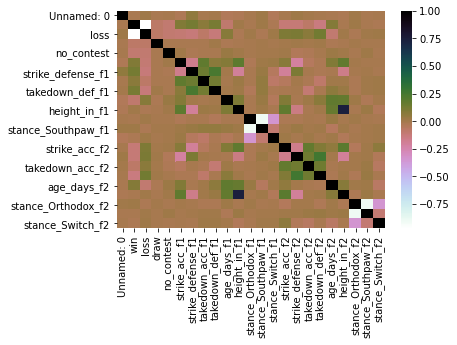

In [143]:
sns.heatmap(df_num.corr(), cmap='cubehelix_r');

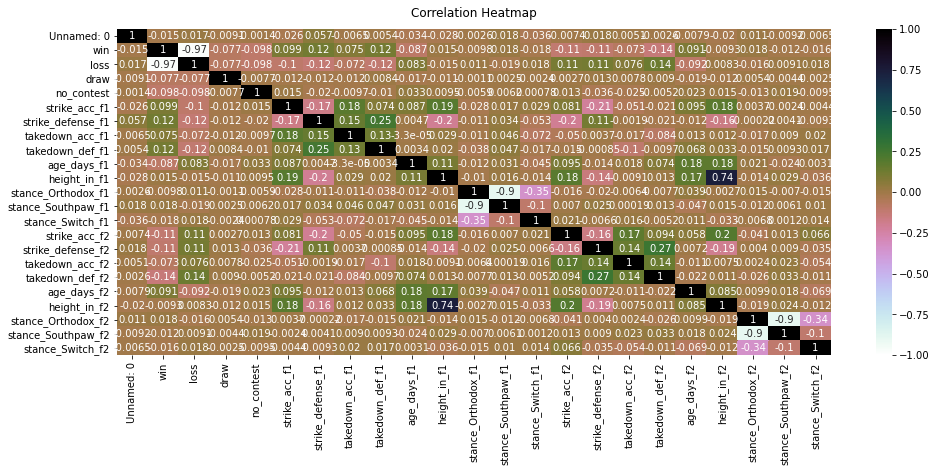

In [144]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_num.corr(), vmin=-1, vmax=1, annot=True, cmap='cubehelix_r')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

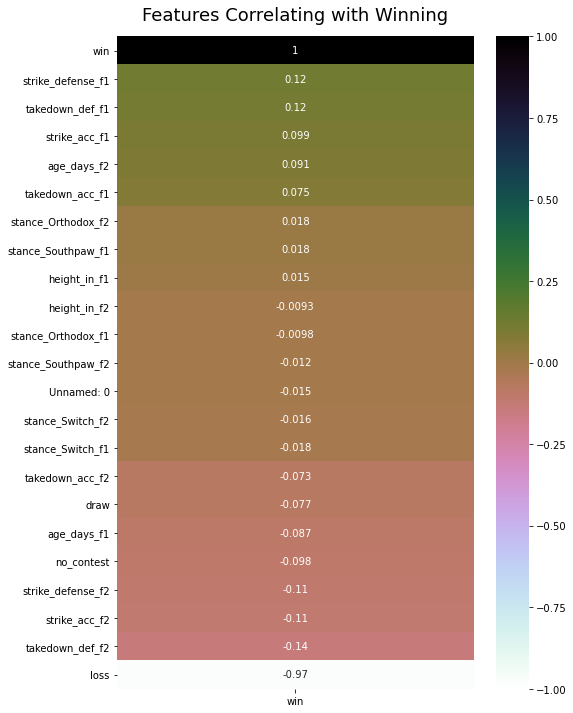

In [145]:

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_num.corr()[['win']].sort_values(by='win', ascending=False), vmin=-1, vmax=1, annot=True, cmap='cubehelix_r')
heatmap.set_title('Features Correlating with Winning', fontdict={'fontsize':18}, pad=16);

Stats Testing:

Levene's Test: tests whether the four means that have been taken from sample populations that have equal variance

Null Hypothesis: There is no difference in strike defense variance between the four samples

Alternaive Hypothesis:  There is a difference in strike defense variance between the four samples

In [229]:
stats.levene(
    train[train.outcome == "fighter1"].strikes_defense_diff,
    train[train.outcome == "fighter2"].strikes_defense_diff,
    train[train.outcome == "draw"].strikes_defense_diff,
    train[train.outcome == "no_contest"].strikes_defense_diff,
)

LeveneResult(statistic=0.7258354436935065, pvalue=0.536440230089227)

A high P value, means we fail to reject the null hypothesis, that there is no difference in strike defense variance between the four samples.

Because we can assume equal variance we can use a f_oneway ANOVA test.

An ANOVA test is used because I am comparing one continuous variable anoung multiple categorical values. 

In [234]:
null_hypothesis = "Average strike defense is the same for all outcomes"
alternative_hypothesis = "Average strike defense is different for all outcomes"
alpha = 0.05 # Let's be 95% certain the result we see isn't due to chance/randomness

In [232]:
# Let's isolate out the strike defense by outcome
fighter1_strike_d = train[train.outcome == "fighter1"].strikes_defense_diff
fighter2_strike_d = train[train.outcome == "fighter2"].strikes_defense_diff
draw_strike_d = train[train.outcome == "draw"].strikes_defense_diff
no_contest_strike_d = train[train.outcome == "no_contest"].strikes_defense_diff


In [227]:
# f_oneway is our ANOVA test
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html for more info
from scipy.stats import f_oneway

f, p = f_oneway(fighter1_strike_d, fighter2_strike_d, draw_strike_d, no_contest_strike_d)
p

7.889634999402037e-37

In [237]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that average strike defense is different for all outcomes")

We reject the null hypothesis that Average strike defense is the same for all outcomes
We move forward with the alternative hypothesis that Average strike defense is different for all outcomes


In [248]:
# testing is fighter1 winning has a greater strike defense average than when fighter2 wins
stats.mannwhitneyu(train[train.outcome == "fighter1"].strikes_defense_diff,
                   train[train.outcome == "fighter2"].strikes_defense_diff,
                   alternative ='greater')

MannwhitneyuResult(statistic=4106314.5, pvalue=7.101738632157293e-35)

Conclusion from mannwhitneyu test:  fighter1 winning has a greater strike defense average than when fighter2 wins

In [230]:
stats.levene(
    train[train.outcome == "fighter1"].takedown_defense_diff,
    train[train.outcome == "fighter2"].takedown_defense_diff,
    train[train.outcome == "draw"].takedown_defense_diff,
    train[train.outcome == "no_contest"].takedown_defense_diff,
)

LeveneResult(statistic=0.49396605158263257, pvalue=0.6864700143264336)

A high P value, means we fail to reject the null hypothesis, that there is no difference in takedown defense variance between the four samples.

In [240]:
null_hypothesis = "Average takedown defense is the same for all outcomes"
alternative_hypothesis = "Average takedown defense is the different for all outcomes"
alpha = 0.05 # Let's be 95% certain the result we see isn't due to chance/randomness

In [242]:
# Let's isolate out the takedown defense by outcome
fighter1_takedown_d = train[train.outcome == "fighter1"].takedown_defense_diff
fighter2_takedown_d = train[train.outcome == "fighter2"].takedown_defense_diff
draw_takedown_d = train[train.outcome == "draw"].takedown_defense_diff
no_contest_takedown_d = train[train.outcome == "no_contest"].takedown_defense_diff


In [243]:
# f_oneway is our ANOVA test
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html for more info
from scipy.stats import f_oneway

f, p = f_oneway(fighter1_takedown_d, fighter2_takedown_d, draw_takedown_d, no_contest_takedown_d)
p

1.445893608541823e-37

In [244]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Average takedown defense is the different for all outcomes.")

We reject the null hypothesis that Average takedown defense is the same for all outcomes
We move forward with the alternative hypothesis that Average takedown defense is the different for all outcomes


In [249]:
# testing is fighter1 winning has a greater takedown defense average than when fighter2 wins
stats.mannwhitneyu(train[train.outcome == "fighter1"].takedown_defense_diff,
                   train[train.outcome == "fighter2"].takedown_defense_diff,
                   alternative ='greater')

MannwhitneyuResult(statistic=4130987.0, pvalue=2.669495487258092e-37)

Conclusion from mannwhitneyu test: fighter1 winning has a greater takedown defense average than when fighter2 wins

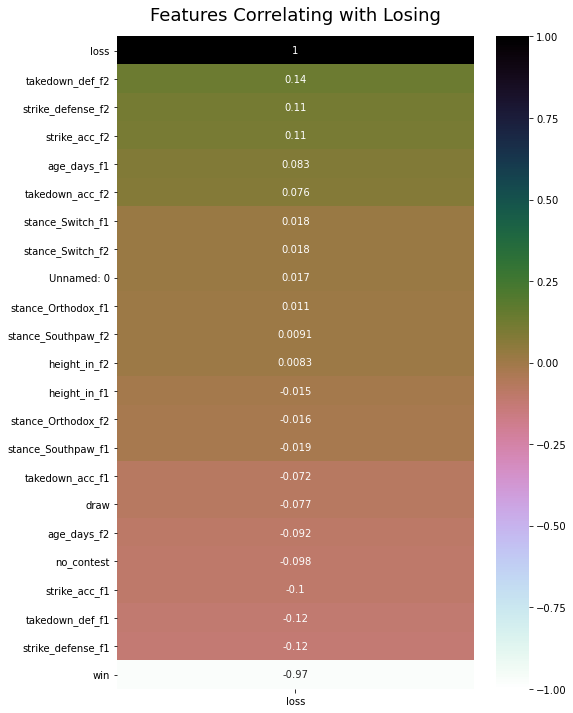

In [146]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_num.corr()[['loss']].sort_values(by='loss', ascending=False), vmin=-1, vmax=1, annot=True, cmap='cubehelix_r')
heatmap.set_title('Features Correlating with Losing', fontdict={'fontsize':18}, pad=16);

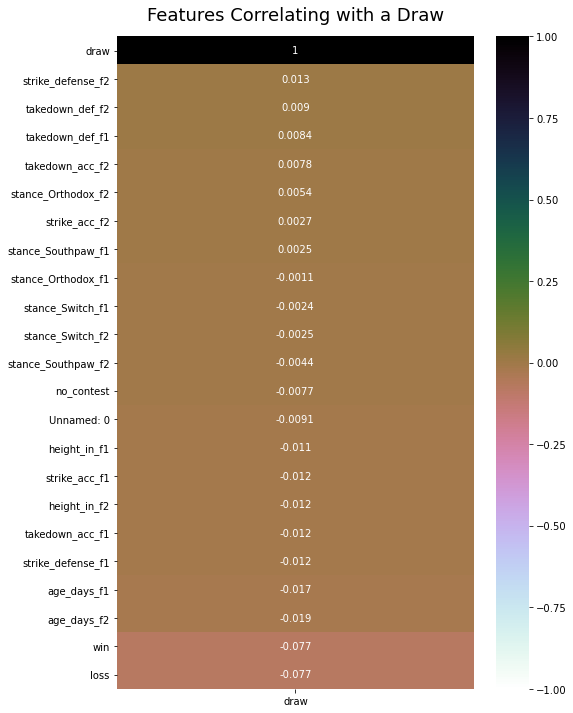

In [147]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_num.corr()[['draw']].sort_values(by='draw', ascending=False), vmin=-1, vmax=1, annot=True, cmap='cubehelix_r')
heatmap.set_title('Features Correlating with a Draw', fontdict={'fontsize':18}, pad=16);

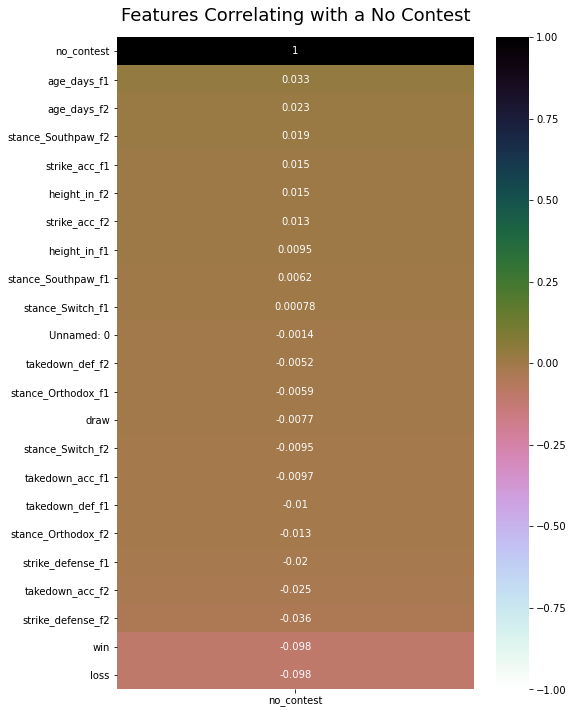

In [148]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_num.corr()[['no_contest']].sort_values(by='no_contest', ascending=False), vmin=-1, vmax=1, annot=True, cmap='cubehelix_r')
heatmap.set_title('Features Correlating with a No Contest', fontdict={'fontsize':18}, pad=16);

In [149]:
correlations = train.corr()
print(correlations)

                         Unnamed: 0       win      loss      draw  no_contest  \
Unnamed: 0                 1.000000 -0.015040  0.016722 -0.009144   -0.001368   
win                       -0.015040  1.000000 -0.968946 -0.076530   -0.097742   
loss                       0.016722 -0.968946  1.000000 -0.076530   -0.097742   
draw                      -0.009144 -0.076530 -0.076530  1.000000   -0.007720   
no_contest                -0.001368 -0.097742 -0.097742 -0.007720    1.000000   
weight_f1                 -0.017455  0.005783 -0.007844 -0.014146    0.021598   
reach_f1                  -0.022225  0.021555 -0.021422 -0.018668    0.013995   
strikes_f1                -0.026201  0.126017 -0.124544 -0.011469    0.001525   
strike_acc_f1             -0.026096  0.098819 -0.099970 -0.011703    0.015052   
strikes_absorbed_f1       -0.016359 -0.110271  0.109784 -0.006736    0.007769   
strike_defense_f1          0.056641  0.124097 -0.118252 -0.012257   -0.020084   
takedowns_f1              -0

In [150]:
print(correlations ['win'])

Unnamed: 0                -0.015040
win                        1.000000
loss                      -0.968946
draw                      -0.076530
no_contest                -0.097742
weight_f1                  0.005783
reach_f1                   0.021555
strikes_f1                 0.126017
strike_acc_f1              0.098819
strikes_absorbed_f1       -0.110271
strike_defense_f1          0.124097
takedowns_f1               0.078602
takedown_acc_f1            0.075447
takedown_def_f1            0.117050
sub_attempt_f1             0.012524
age_days_f1               -0.087240
age_f1                    -0.085919
height_in_f1               0.015116
stance_Orthodox_f1        -0.009829
stance_Southpaw_f1         0.017782
stance_Switch_f1          -0.017803
weight_f2                 -0.014347
reach_f2                  -0.023677
strikes_f2                -0.118525
strike_acc_f2             -0.109859
strikes_absorbed_f2        0.111671
strike_defense_f2         -0.109174
takedowns_f2              -0

In [151]:
c_cov = train[train.fighter1.isin(['Colby Covington'])]

In [152]:
c_cov

,Unnamed: 0,event_name,fighter1,fighter2,outcome,win,loss,draw,no_contest,weight_f1,reach_f1,stance_f1,strikes_f1,strike_acc_f1,strikes_absorbed_f1,strike_defense_f1,takedowns_f1,takedown_acc_f1,takedown_def_f1,sub_attempt_f1,age_days_f1,age_f1,outcome_f1,height_in_f1,stance_Orthodox_f1,stance_Southpaw_f1,stance_Switch_f1,weight_f2,reach_f2,stance_f2,strikes_f2,strike_acc_f2,strikes_absorbed_f2,strike_defense_f2,takedowns_f2,takedown_acc_f2,takedown_def_f2,sub_attempt_f2,age_days_f2,age_f2,outcome_f2,height_in_f2,stance_Orthodox_f2,stance_Southpaw_f2,stance_Switch_f2,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
1788,1788,UFC 245: Usman vs. Covington,Colby Covington,Kamaru Usman,fighter2,0,1,0,0,170.0,72.0,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,11618,31.0,fighter2,71,1,0,0,170.0,76.0,Switch,4.63,54,2.40,57,3.27,48,100,0.1,11905,32.0,fighter1,72,0,0,1,0.0,-4.0,-0.51,-16.0,0.46,-2.0,1.34,2.0,-25.0,0.0,-287.0,-1.0
1789,1789,UFC 187: Johnson vs Cormier,Colby Covington,Mike Pyle,fighter1,1,0,0,0,170.0,72.0,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,9952,27.0,fighter1,71,1,0,0,170.0,74.0,Orthodox,2.74,45,2.84,60,1.80,35,70,1.5,14492,39.0,fighter2,72,1,0,0,0.0,-2.0,1.38,-7.0,0.02,-5.0,2.81,15.0,5.0,-1.4,-4540.0,-1.0
1787,1787,UFC 194: Aldo vs McGregor,Colby Covington,Warlley Alves,fighter2,0,1,0,0,170.0,72.0,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,10155,27.0,fighter2,71,1,0,0,170.0,72.0,Orthodox,3.09,47,3.62,50,1.48,54,75,1.0,9108,24.0,fighter1,71,1,0,0,0.0,0.0,1.03,-9.0,-0.76,5.0,3.13,-4.0,0.0,-0.9,1047.0,0.0
1785,1785,UFC on FOX: VanZant vs. Waterson,Colby Covington,Bryan Barberena,fighter1,1,0,0,0,170.0,72.0,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,10526,28.0,fighter1,71,1,0,0,170.0,72.0,Southpaw,5.48,48,4.70,45,0.23,28,60,0.5,10090,27.0,fighter2,72,0,1,0,0.0,0.0,-1.36,-10.0,-1.84,10.0,4.38,22.0,15.0,-0.4,436.0,-1.0
1783,1783,UFC Fight Night: Covington vs. Lawler,Colby Covington,Robbie Lawler,fighter1,1,0,0,0,170.0,72.0,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,11485,31.0,fighter1,71,1,0,0,170.0,74.0,Southpaw,3.50,45,4.16,60,0.68,64,64,0.0,13650,37.0,fighter2,71,0,1,0,0.0,-2.0,0.62,-7.0,-1.30,-5.0,3.93,-14.0,11.0,0.1,-2165.0,0.0
1786,1786,UFC Fight Night: Holm vs. Correia,Colby Covington,Dong Hyun Kim,fighter1,1,0,0,0,170.0,72.0,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,10708,29.0,fighter1,71,1,0,0,170.0,76.0,Southpaw,2.12,49,1.89,58,2.93,43,71,0.6,12996,35.0,fighter2,74,0,1,0,0.0,-4.0,2.00,-11.0,0.97,-3.0,1.68,7.0,4.0,-0.5,-2288.0,-3.0


In [153]:
j_mas = train[train.fighter1.isin(['Jorge Masvidal'])]

In [154]:
j_mas

,Unnamed: 0,event_name,fighter1,fighter2,outcome,win,loss,draw,no_contest,weight_f1,reach_f1,stance_f1,strikes_f1,strike_acc_f1,strikes_absorbed_f1,strike_defense_f1,takedowns_f1,takedown_acc_f1,takedown_def_f1,sub_attempt_f1,age_days_f1,age_f1,outcome_f1,height_in_f1,stance_Orthodox_f1,stance_Southpaw_f1,stance_Switch_f1,weight_f2,reach_f2,stance_f2,strikes_f2,strike_acc_f2,strikes_absorbed_f2,strike_defense_f2,takedowns_f2,takedown_acc_f2,takedown_def_f2,sub_attempt_f2,age_days_f2,age_f2,outcome_f2,height_in_f2,stance_Orthodox_f2,stance_Southpaw_f2,stance_Switch_f2,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
4769,4769,UFC 239: Jones vs. Santos,Jorge Masvidal,Ben Askren,fighter1,1,0,0,0,170.0,74.0,Orthodox,4.22,48,3.01,65,1.54,59,75,0.3,12654,34.0,fighter1,71,1,0,0,170.0,73.0,Orthodox,3.64,49,5.66,36,4.33,55,0,0.9,12771,34.0,fighter2,71,1,0,0,0.0,1.0,0.58,-1.0,-2.65,29.0,-2.79,4.0,75.0,-0.6,-117.0,0.0
4772,4772,UFC Fight Night: Almeida vs Garbrandt,Jorge Masvidal,Lorenz Larkin,fighter2,0,1,0,0,170.0,74.0,Orthodox,4.22,48,3.01,65,1.54,59,75,0.3,11521,31.0,fighter2,71,1,0,0,170.0,72.0,Orthodox,3.53,46,2.74,63,0.27,42,79,0.1,10861,29.0,fighter1,71,1,0,0,0.0,2.0,0.69,2.0,0.27,2.0,1.27,17.0,-4.0,0.2,660.0,0.0
4774,4774,UFC on FOX: Werdum vs Browne,Jorge Masvidal,Pat Healy,fighter1,1,0,0,0,170.0,74.0,Orthodox,4.22,48,3.01,65,1.54,59,75,0.3,10750,29.0,fighter1,71,1,0,0,155.0,72.0,Orthodox,2.57,36,2.57,50,3.08,37,55,1.1,11231,30.0,fighter2,72,1,0,0,15.0,2.0,1.65,12.0,0.44,15.0,-1.54,22.0,20.0,-0.8,-481.0,-1.0
4767,4767,UFC on FOX: Johnson vs Moraga,Jorge Masvidal,Michael Chiesa,fighter1,1,0,0,0,170.0,74.0,Orthodox,4.22,48,3.01,65,1.54,59,75,0.3,10484,28.0,fighter1,71,1,0,0,170.0,75.0,Southpaw,1.89,40,1.71,54,3.60,52,68,0.9,9364,25.0,fighter2,73,0,1,0,0.0,-1.0,2.33,8.0,1.30,11.0,-2.06,7.0,7.0,-0.6,1120.0,-2.0
4761,4761,UFC on FOX: Lawler vs Brown,Jorge Masvidal,Daron Cruickshank,fighter1,1,0,0,0,170.0,74.0,Orthodox,4.22,48,3.01,65,1.54,59,75,0.3,10848,29.0,fighter1,71,1,0,0,155.0,72.0,Switch,2.88,38,2.98,57,2.04,41,60,0.2,10637,29.0,fighter2,68,0,0,1,15.0,2.0,1.34,10.0,0.03,8.0,-0.50,18.0,15.0,0.1,211.0,3.0
4770,4770,UFC 201: Lawler vs. Woodley,Jorge Masvidal,Ross Pearson,fighter1,1,0,0,0,170.0,74.0,Orthodox,4.22,48,3.01,65,1.54,59,75,0.3,11583,31.0,fighter1,71,1,0,0,155.0,69.0,Orthodox,3.68,40,4.09,62,0.74,35,75,0.0,11630,31.0,fighter2,68,1,0,0,15.0,5.0,0.54,8.0,-1.08,3.0,0.80,24.0,0.0,0.3,-47.0,3.0
4765,4765,UFC on FOX: Shevchenko vs. Pena,Jorge Masvidal,Donald Cerrone,fighter1,1,0,0,0,170.0,74.0,Orthodox,4.22,48,3.01,65,1.54,59,75,0.3,11765,32.0,fighter1,71,1,0,0,170.0,73.0,Orthodox,4.43,46,4.49,53,1.18,33,74,1.2,12359,33.0,fighter2,73,1,0,0,0.0,1.0,-0.21,2.0,-1.48,12.0,0.36,26.0,1.0,-0.9,-594.0,-2.0
4764,4764,UFC 178: Johnson vs Cariaso,Jorge Masvidal,James Krause,fighter1,1,0,0,0,170.0,74.0,Orthodox,4.22,48,3.01,65,1.54,59,75,0.3,10911,29.0,fighter1,71,1,0,0,170.0,73.0,Orthodox,4.79,49,4.11,61,0.96,18,59,0.9,10342,28.0,fighter2,74,1,0,0,0.0,1.0,-0.57,-1.0,-1.10,4.0,0.58,41.0,16.0,-0.6,569.0,-3.0


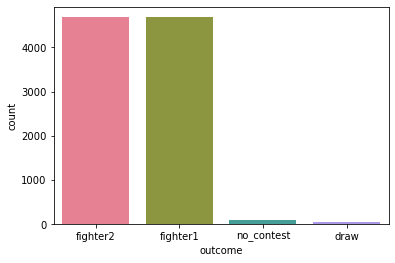

In [155]:
sns.countplot(x="outcome", data=final_df, palette="husl");


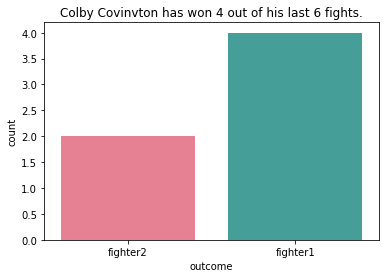

In [156]:
sns.countplot(x="outcome", data=c_cov, palette="husl");
plt.title("Colby Covinvton has won 4 out of his last 6 fights.")
plt.show()

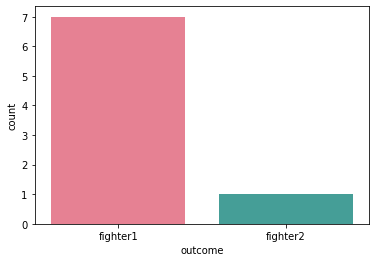

In [157]:
sns.countplot(x="outcome", data=j_mas, palette="husl");

In [158]:
# read .csv
colby = pd.read_csv('Last 10 Colby Fights.csv')

In [159]:
colby.head()

,event_name,fighter1,fighter2,outcome,win,loss,draw,no_contest,weight_f1,reach_f1,stance_f1,strikes_f1,strike_acc_f1,strikes_absorbed_f1,strike_defense_f1,takedowns_f1,takedown_acc_f1,takedown_def_f1,sub_attempt_f1,age_days_f1,age_f1,outcome_f1,height_in_f1,stance_Orthodox_f1,stance_Southpaw_f1,stance_Switch_f1,weight_f2,reach_f2,stance_f2,strikes_f2,strike_acc_f2,strikes_absorbed_f2,strike_defense_f2,takedowns_f2,takedown_acc_f2,takedown_def_f2,sub_attempt_f2,age_days_f2,age_f2,outcome_f2,height_in_f2,stance_Orthodox_f2,stance_Southpaw_f2,stance_Switch_f2
0,UFC 268: Usman vs. Covington 2,Colby Covington,Kamaru Usman,loss,0,1,0,0,170,72,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,12311,32,loss,71,1,0,0,170,76,Switch,4.63,54,2.40,57,3.27,48,100,0.1,12598,34,loss,72,0,0,1
1,UFC Fight Night: Covington vs. Woodley,Colby Covington,Tyron Woodley,win,1,0,0,0,170,72,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,11898,32,win,71,1,0,0,170,74,Orthodox,2.36,48,2.76,54,1.06,40,87,0.4,14045,38,win,69,1,0,0
2,UFC 245: Usman vs. Covington,Colby Covington,Kamaru Usman,loss,0,1,0,0,170,72,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,11618,31,loss,71,1,0,0,170,76,Switch,4.63,54,2.40,57,3.27,48,100,0.1,11905,32,loss,72,0,0,1
3,UFC Fight Night: Covington vs. Lawler,Colby Covington,Robbie Lawler,win,1,0,0,0,170,72,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,11485,31,win,71,1,0,0,170,74,Southpaw,3.50,45,4.16,60,0.68,64,64,0.0,13650,37,win,71,0,1,0
4,UFC 225: Whittaker vs. Romero 2,Colby Covington,Rafael Dos Anjos,win,1,0,0,0,170,72,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,11065,30,win,71,1,0,0,155,70,Southpaw,3.49,46,3.22,61,1.93,37,58,0.6,12279,33,win,68,0,1,0


In [160]:
colby.dtypes

event_name              object
fighter1                object
fighter2                object
outcome                 object
win                      int64
loss                     int64
draw                     int64
no_contest               int64
weight_f1                int64
reach_f1                 int64
stance_f1               object
strikes_f1             float64
strike_acc_f1            int64
strikes_absorbed_f1    float64
strike_defense_f1        int64
takedowns_f1           float64
takedown_acc_f1          int64
takedown_def_f1          int64
sub_attempt_f1         float64
age_days_f1              int64
age_f1                   int64
outcome_f1              object
height_in_f1             int64
stance_Orthodox_f1       int64
stance_Southpaw_f1       int64
stance_Switch_f1         int64
weight_f2                int64
reach_f2                 int64
stance_f2               object
strikes_f2             float64
strike_acc_f2            int64
strikes_absorbed_f2    float64
strike_d

In [161]:
# Change data types
colby['age_days_f2'] = colby.age_days_f2.astype(float) 


In [162]:
# Calculate the difference in stats between fighter1 and fighter2. Save to new column. 
colby['weight_diff'] = colby.weight_f1 - colby.weight_f2
colby['reach_diff'] = colby.reach_f1 - colby.reach_f2
colby['strike_diff'] = colby.strikes_f1 - colby.strikes_f2
colby['strike_acc_diff'] = colby.strike_acc_f1 - colby.strike_acc_f2
colby['strikes_absorbed_diff'] = colby.strikes_absorbed_f1 - colby.strikes_absorbed_f2
colby['strikes_defense_diff'] = colby.strike_defense_f1 - colby.strike_defense_f2
colby['strikes_defense_diff'] = colby.strike_defense_f1 - colby.strike_defense_f2
colby['takedown_attempts_diff'] = colby.takedowns_f1 - colby.takedowns_f2
colby['takedown_acc_diff'] = colby.takedown_acc_f1 - colby.takedown_acc_f2
colby['takedown_defense_diff'] = colby.takedown_def_f1 - colby.takedown_def_f2
colby['submission_attempt_diff'] = colby.sub_attempt_f1 - colby.sub_attempt_f2
colby['age_diff'] = colby.age_days_f1 - colby.age_days_f2
colby['height_diff'] = colby.height_in_f1 - colby.height_in_f2



In [163]:
colby.head()

,event_name,fighter1,fighter2,outcome,win,loss,draw,no_contest,weight_f1,reach_f1,stance_f1,strikes_f1,strike_acc_f1,strikes_absorbed_f1,strike_defense_f1,takedowns_f1,takedown_acc_f1,takedown_def_f1,sub_attempt_f1,age_days_f1,age_f1,outcome_f1,height_in_f1,stance_Orthodox_f1,stance_Southpaw_f1,stance_Switch_f1,weight_f2,reach_f2,stance_f2,strikes_f2,strike_acc_f2,strikes_absorbed_f2,strike_defense_f2,takedowns_f2,takedown_acc_f2,takedown_def_f2,sub_attempt_f2,age_days_f2,age_f2,outcome_f2,height_in_f2,stance_Orthodox_f2,stance_Southpaw_f2,stance_Switch_f2,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
0,UFC 268: Usman vs. Covington 2,Colby Covington,Kamaru Usman,loss,0,1,0,0,170,72,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,12311,32,loss,71,1,0,0,170,76,Switch,4.63,54,2.40,57,3.27,48,100,0.1,12598.0,34,loss,72,0,0,1,0,-4,-0.51,-16,0.46,-2,1.34,2,-25,0.0,-287.0,-1
1,UFC Fight Night: Covington vs. Woodley,Colby Covington,Tyron Woodley,win,1,0,0,0,170,72,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,11898,32,win,71,1,0,0,170,74,Orthodox,2.36,48,2.76,54,1.06,40,87,0.4,14045.0,38,win,69,1,0,0,0,-2,1.76,-10,0.10,1,3.55,10,-12,-0.3,-2147.0,2
2,UFC 245: Usman vs. Covington,Colby Covington,Kamaru Usman,loss,0,1,0,0,170,72,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,11618,31,loss,71,1,0,0,170,76,Switch,4.63,54,2.40,57,3.27,48,100,0.1,11905.0,32,loss,72,0,0,1,0,-4,-0.51,-16,0.46,-2,1.34,2,-25,0.0,-287.0,-1
3,UFC Fight Night: Covington vs. Lawler,Colby Covington,Robbie Lawler,win,1,0,0,0,170,72,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,11485,31,win,71,1,0,0,170,74,Southpaw,3.50,45,4.16,60,0.68,64,64,0.0,13650.0,37,win,71,0,1,0,0,-2,0.62,-7,-1.30,-5,3.93,-14,11,0.1,-2165.0,0
4,UFC 225: Whittaker vs. Romero 2,Colby Covington,Rafael Dos Anjos,win,1,0,0,0,170,72,Orthodox,4.12,38,2.86,55,4.61,50,75,0.1,11065,30,win,71,1,0,0,155,70,Southpaw,3.49,46,3.22,61,1.93,37,58,0.6,12279.0,33,win,68,0,1,0,15,2,0.63,-8,-0.36,-6,2.68,13,17,-0.5,-1214.0,3


In [164]:
# Create df with desired difference columns
colby_diff = colby[['event_name', 'fighter1', 'fighter2', 'outcome', 'stance_f1', 'stance_f2', 'weight_diff', 'reach_diff', 'strike_diff', 'strike_acc_diff', 'strikes_absorbed_diff', 'strikes_defense_diff', 'takedown_attempts_diff', 'takedown_acc_diff', 'takedown_defense_diff', 'submission_attempt_diff', 'age_diff', 'height_diff']].copy(0)

In [165]:
colby_diff.head()

,event_name,fighter1,fighter2,outcome,stance_f1,stance_f2,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
0,UFC 268: Usman vs. Covington 2,Colby Covington,Kamaru Usman,loss,Orthodox,Switch,0,-4,-0.51,-16,0.46,-2,1.34,2,-25,0.0,-287.0,-1
1,UFC Fight Night: Covington vs. Woodley,Colby Covington,Tyron Woodley,win,Orthodox,Orthodox,0,-2,1.76,-10,0.10,1,3.55,10,-12,-0.3,-2147.0,2
2,UFC 245: Usman vs. Covington,Colby Covington,Kamaru Usman,loss,Orthodox,Switch,0,-4,-0.51,-16,0.46,-2,1.34,2,-25,0.0,-287.0,-1
3,UFC Fight Night: Covington vs. Lawler,Colby Covington,Robbie Lawler,win,Orthodox,Southpaw,0,-2,0.62,-7,-1.30,-5,3.93,-14,11,0.1,-2165.0,0
4,UFC 225: Whittaker vs. Romero 2,Colby Covington,Rafael Dos Anjos,win,Orthodox,Southpaw,15,2,0.63,-8,-0.36,-6,2.68,13,17,-0.5,-1214.0,3


In [166]:
colby_diff = get_colby()

In [167]:
colby_diff

,event_name,fighter1,fighter2,outcome,stance_f1,stance_f2,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
0,UFC 268: Usman vs. Covington 2,Colby Covington,Kamaru Usman,loss,Orthodox,Switch,0,-4,-0.51,-16,0.46,-2,1.34,2,-25,0.0,-287.0,-1
1,UFC Fight Night: Covington vs. Woodley,Colby Covington,Tyron Woodley,win,Orthodox,Orthodox,0,-2,1.76,-10,0.10,1,3.55,10,-12,-0.3,-2147.0,2
2,UFC 245: Usman vs. Covington,Colby Covington,Kamaru Usman,loss,Orthodox,Switch,0,-4,-0.51,-16,0.46,-2,1.34,2,-25,0.0,-287.0,-1
3,UFC Fight Night: Covington vs. Lawler,Colby Covington,Robbie Lawler,win,Orthodox,Southpaw,0,-2,0.62,-7,-1.30,-5,3.93,-14,11,0.1,-2165.0,0
4,UFC 225: Whittaker vs. Romero 2,Colby Covington,Rafael Dos Anjos,win,Orthodox,Southpaw,15,2,0.63,-8,-0.36,-6,2.68,13,17,-0.5,-1214.0,3
5,UFC Fight Night: Brunson vs. Machida,Colby Covington,Demian Maia,win,Orthodox,Southpaw,0,0,2.30,-5,0.83,-8,2.06,24,14,-0.9,-3760.0,-2
6,UFC Fight Night: Holm vs. Correia,Colby Covington,Dong Hyun Kim,win,Orthodox,Southpaw,0,-4,2.00,-11,0.97,-3,1.68,7,4,-0.5,-2288.0,-3
7,UFC on FOX: VanZant vs. Waterson,Colby Covington,Bryan Barberena,win,Orthodox,Southpaw,0,0,-1.36,-10,-1.84,10,4.38,22,15,-0.4,436.0,-1
8,UFC 202: Diaz vs. McGregor 2,Colby Covington,Max Griffin,win,Orthodox,Orthodox,0,-4,-0.02,-10,-1.08,-1,2.91,-1,9,-0.4,-815.0,0
9,UFC Fight Night: MacDonald vs Thompson,Colby Covington,Jonathan Meunier,win,Orthodox,Switch,0,-3,0.65,-12,1.43,-14,4.03,17,17,0.1,-202.0,-4


In [201]:
jorge_diff.strikes_defense_diff.mean() + colby_diff.strikes_defense_diff.mean()

6.300000000000001

In [198]:
colby_diff.strikes_defense_diff.mean()

-3.0

In [197]:
jorge_diff.strikes_defense_diff.mean()

9.3

In [168]:
colby_diff.dtypes

event_name                  object
fighter1                    object
fighter2                    object
outcome                     object
stance_f1                   object
stance_f2                   object
weight_diff                  int64
reach_diff                   int64
strike_diff                float64
strike_acc_diff              int64
strikes_absorbed_diff      float64
strikes_defense_diff         int64
takedown_attempts_diff     float64
takedown_acc_diff            int64
takedown_defense_diff        int64
submission_attempt_diff    float64
age_diff                   float64
height_diff                  int64
dtype: object

In [169]:
jorge_diff = get_jorge()

In [170]:
jorge_diff

,event_name,fighter1,fighter2,outcome,stance_f1,stance_f2,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
0,UFC 261: Usman vs. Masvidal 2,Jorge Masvidal,Kamaru Usman,loss,Orthodox,Switch,0,-2,-0.41,-6,0.61,8,-1.73,11,-25,0.2,483,-1
1,UFC 251: Usman vs. Masvidal,Jorge Masvidal,Kamaru Usman,loss,Orthodox,Switch,0,-2,-0.41,-6,0.61,8,-1.73,11,-25,0.2,483,-1
2,UFC 244: Masvidal vs. Diaz,Jorge Masvidal,Nate Diaz,win,Orthodox,Southpaw,0,-2,-0.40,3,-0.77,12,0.35,29,33,-1.1,155,-1
3,UFC 239: Jones vs. Santos,Jorge Masvidal,Ben Askren,win,Orthodox,Orthodox,0,1,0.58,-1,-2.65,29,-2.79,4,75,-0.6,-117,0
4,UFC Fight Night: Till vs. Masvidal,Jorge Masvidal,Darren Till,win,Orthodox,Southpaw,-15,0,1.95,2,0.02,7,1.00,18,-7,0.3,2964,-1
5,UFC 217: Bisping vs. St-Pierre,Jorge Masvidal,Stephen Thompson,loss,Orthodox,Orthodox,0,-1,-0.02,5,0.21,7,1.22,14,-3,0.3,-640,-1
6,UFC 211: Miocic vs. Dos Santos,Jorge Masvidal,Demian Maia,loss,Orthodox,Southpaw,0,2,2.40,5,0.98,2,-1.01,33,14,-0.7,-2563,-2
7,UFC on FOX: Shevchenko vs. Pena,Jorge Masvidal,Donald Cerrone,win,Orthodox,Orthodox,0,1,-0.21,2,-1.48,12,0.36,26,1,-0.9,-594,-2
8,The Ultimate Fighter: Tournament of Champions ...,Jorge Masvidal,Jake Ellenberger,win,Orthodox,Orthodox,0,3,1.75,9,0.18,5,-0.50,12,-11,-0.1,136,2
9,UFC 201: Lawler vs. Woodley,Jorge Masvidal,Ross Pearson,win,Orthodox,Orthodox,15,5,0.54,8,-1.08,3,0.80,24,0,0.3,-47,3


In [171]:
jorge_diff.dtypes

event_name                  object
fighter1                    object
fighter2                    object
outcome                     object
stance_f1                   object
stance_f2                   object
weight_diff                  int64
reach_diff                   int64
strike_diff                float64
strike_acc_diff              int64
strikes_absorbed_diff      float64
strikes_defense_diff         int64
takedown_attempts_diff     float64
takedown_acc_diff            int64
takedown_defense_diff        int64
submission_attempt_diff    float64
age_diff                     int64
height_diff                  int64
dtype: object

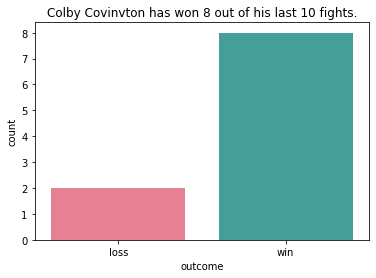

In [172]:
sns.countplot(x="outcome", data=colby_diff, palette="husl");
plt.title("Colby Covinvton has won 8 out of his last 10 fights.")
plt.show()

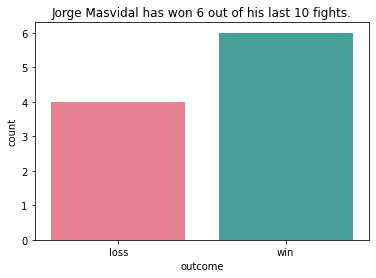

In [173]:
sns.countplot(x="outcome", data=jorge_diff, palette="husl");
plt.title("Jorge Masvidal has won 6 out of his last 10 fights.")
plt.show()

In [174]:
#sns.countplot(x="reach_diff", data=colby_diff, palette="husl");
#plt.title("Colby Covinvton Usually has a Reach Deficit.")
#plt.show()

In [175]:
#sns.countplot(x="reach_diff", data=jorge_diff, palette="husl");
#plt.title("Jorge Masvidal has had the Reach Advantage as Often as he has the Deficit.")
#plt.show()

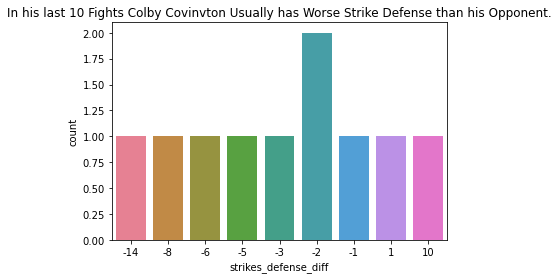

In [176]:
sns.countplot(x="strikes_defense_diff", data=colby_diff, palette="husl");
plt.title("In his last 10 Fights Colby Covinvton Usually has Worse Strike Defense than his Opponent.")
plt.show()

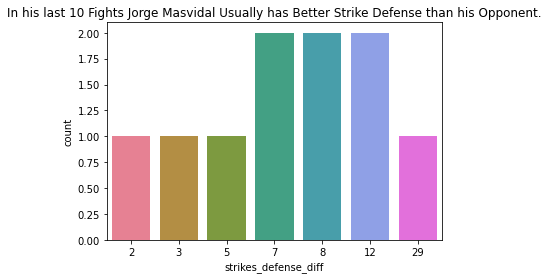

In [177]:
sns.countplot(x="strikes_defense_diff", data=jorge_diff, palette="husl");
plt.title("In his last 10 Fights Jorge Masvidal Usually has Better Strike Defense than his Opponent.")
plt.show()

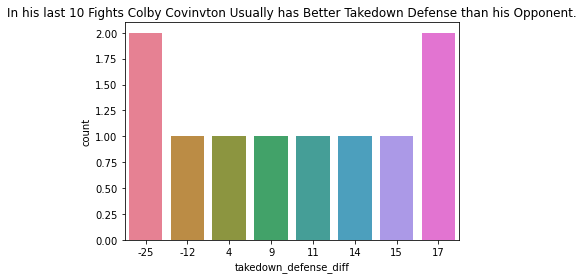

In [178]:
sns.countplot(x="takedown_defense_diff", data=colby_diff, palette="husl");
plt.title("In his last 10 Fights Colby Covinvton Usually has Better Takedown Defense than his Opponent.")
plt.show()

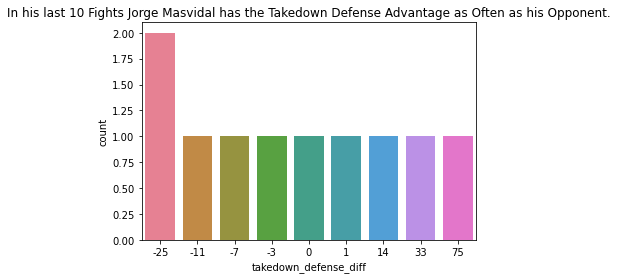

In [179]:
sns.countplot(x="takedown_defense_diff", data=jorge_diff, palette="husl");
plt.title("In his last 10 Fights Jorge Masvidal has the Takedown Defense Advantage as Often as his Opponent.")
plt.show()

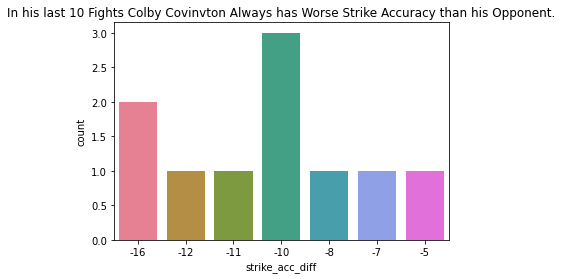

In [180]:
sns.countplot(x="strike_acc_diff", data=colby_diff, palette="husl");
plt.title("In his last 10 Fights Colby Covinvton Always has Worse Strike Accuracy than his Opponent.")
plt.show()

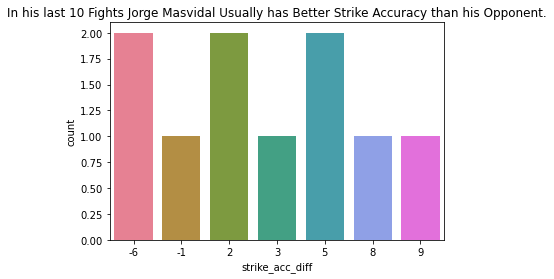

In [181]:
sns.countplot(x="strike_acc_diff", data=jorge_diff, palette="husl");
plt.title("In his last 10 Fights Jorge Masvidal Usually has Better Strike Accuracy than his Opponent.")
plt.show()

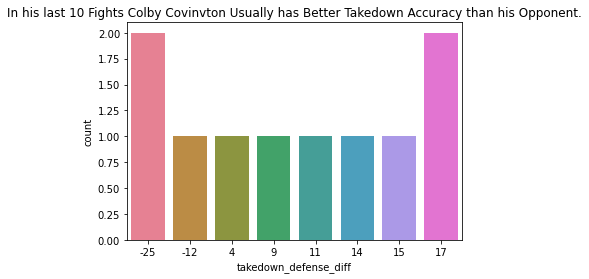

In [182]:
sns.countplot(x="takedown_defense_diff", data=colby_diff, palette="husl");
plt.title("In his last 10 Fights Colby Covinvton Usually has Better Takedown Accuracy than his Opponent.")
plt.show()

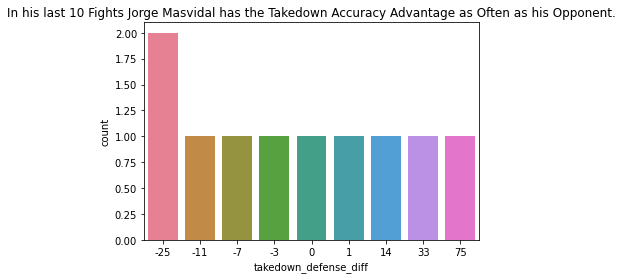

In [183]:
sns.countplot(x="takedown_defense_diff", data=jorge_diff, palette="husl");
plt.title("In his last 10 Fights Jorge Masvidal has the Takedown Accuracy Advantage as Often as his Opponent.")
plt.show()

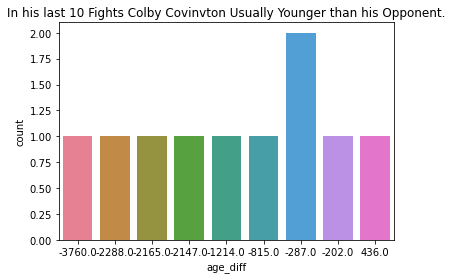

In [184]:
sns.countplot(x="age_diff", data=colby_diff, palette="husl");
plt.title("In his last 10 Fights Colby Covinvton Usually Younger than his Opponent.")
plt.show()

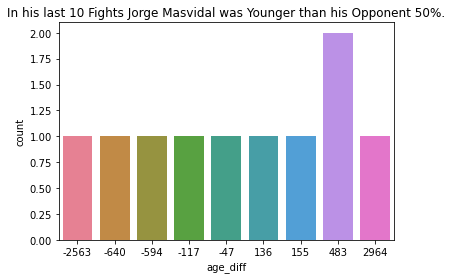

In [185]:
sns.countplot(x="age_diff", data=jorge_diff, palette="husl");
plt.title("In his last 10 Fights Jorge Masvidal was Younger than his Opponent 50%.")
plt.show()

In [186]:
def get_colby_vs_jorge(): 
   
    # imports
    import pandas as pd
    import numpy as np
    # Ignore Warnings
    import warnings
    warnings.filterwarnings("ignore")
    
    # read .csv
    colby_vs_jorge = pd.read_csv('Colby vs Jorge.csv')
    
    # Calculate the difference in stats between fighter1 and fighter2. Save to new column. 
    colby_vs_jorge['weight_diff'] = colby_vs_jorge.weight_f1 - colby_vs_jorge.weight_f2
    colby_vs_jorge['reach_diff'] = colby_vs_jorge.reach_f1 - colby_vs_jorge.reach_f2
    colby_vs_jorge['strike_diff'] = colby_vs_jorge.strikes_f1 - colby_vs_jorge.strikes_f2
    colby_vs_jorge['strike_acc_diff'] = colby_vs_jorge.strike_acc_f1 - colby_vs_jorge.strike_acc_f2
    colby_vs_jorge['strikes_absorbed_diff'] = colby_vs_jorge.strikes_absorbed_f1 - colby_vs_jorge.strikes_absorbed_f2
    colby_vs_jorge['strikes_defense_diff'] = colby_vs_jorge.strike_defense_f1 - colby_vs_jorge.strike_defense_f2
    colby_vs_jorge['strikes_defense_diff'] = colby_vs_jorge.strike_defense_f1 - colby_vs_jorge.strike_defense_f2
    colby_vs_jorge['takedown_attempts_diff'] = colby_vs_jorge.takedowns_f1 - colby_vs_jorge.takedowns_f2
    colby_vs_jorge['takedown_acc_diff'] = colby_vs_jorge.takedown_acc_f1 - colby_vs_jorge.takedown_acc_f2
    colby_vs_jorge['takedown_defense_diff'] = colby_vs_jorge.takedown_def_f1 - colby_vs_jorge.takedown_def_f2
    colby_vs_jorge['submission_attempt_diff'] = colby_vs_jorge.sub_attempt_f1 - colby_vs_jorge.sub_attempt_f2
    colby_vs_jorge['age_diff'] = colby_vs_jorge.age_days_f1 - colby_vs_jorge.age_days_f2
    colby_vs_jorge['height_diff'] = colby_vs_jorge.height_in_f1 - colby_vs_jorge.height_in_f2

    # Create df with desired difference columns
    colby_vs_jorge_diff = colby_vs_jorge[['weight_diff', 'reach_diff', 'strike_diff', 'strike_acc_diff', 'strikes_absorbed_diff', 'strikes_defense_diff', 'takedown_attempts_diff', 'takedown_acc_diff', 'takedown_defense_diff', 'submission_attempt_diff', 'age_diff', 'height_diff']].copy(0)
    
    return colby_vs_jorge_diff
    

In [187]:
colby_vs_jorge_diff = get_colby_vs_jorge()

In [118]:
colby_vs_jorge_diff

,weight_diff,reach_diff,strike_diff,strike_acc_diff,strikes_absorbed_diff,strikes_defense_diff,takedown_attempts_diff,takedown_acc_diff,takedown_defense_diff,submission_attempt_diff,age_diff,height_diff
0,0,-2,-0.1,-10,-0.15,-10,3.07,-9,0,-0.2,-1197,0


In [190]:
# Create df with desired difference columns
colby_vs_jorge_features = colby_vs_jorge_diff[['strike_acc_diff', 'strikes_defense_diff', 'takedown_acc_diff', 'takedown_defense_diff', 'age_diff']].copy(0)
    

In [191]:
colby_vs_jorge_features

,strike_acc_diff,strikes_defense_diff,takedown_acc_diff,takedown_defense_diff,age_diff
0,-10,-10,-9,0,-1197


In [205]:
colby_diff.strikes_defense_diff.mean()

-3.0

In [206]:
jorge_diff.strikes_defense_diff.mean()

9.3

In [210]:
colby_diff.takedown_defense_diff.mean()

2.5

In [211]:
jorge_diff.takedown_defense_diff.mean()

5.2

In [208]:
colby_diff.strike_acc_diff.mean()

-10.5

In [209]:
jorge_diff.strike_acc_diff.mean()

2.1

In [214]:
colby_diff.takedown_acc_diff.mean()

8.2

In [213]:
jorge_diff.takedown_acc_diff.mean()

18.2

In [216]:
colby_diff.age_diff.mean()

-1272.9

In [217]:
jorge_diff.age_diff.mean()

26.0